In [1]:
#importing lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


<h3> Looks like our dataset has no NaN! • Overview, Original_Language and Poster-Url
wouldn't be so useful during analysis • Release_Date column needs to be casted into
date time and to extract only the year value

In [4]:
# exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

<h2> genres are saperated by commas followed by whitespaces.

In [5]:
# check for duplicated rows
df.duplicated().sum()

0

<h3> Our dataset has no duplicated rows either.

In [6]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


<h3>
Exploration Summary
• we have a dataframe consisting of 9827 rows and 9 columns.
• our dataset looks a bit tidy with no NaNs nor duplicated values.
• Release_Date column needs to be casted into date time and to extract only the year.
• Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis.
• there is noticable outliers in Popularity column.
• Vote_Average bettter be categorised for proper analysis.
• Genre column has comma saperated values and white spaces that needs to be handle

In [7]:
# Data Cleaning

Casting Release_Date column and extracing year values

In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [10]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping Overview, Original_Languege
and Poster-Url

In [13]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular, average,
below_avg, not_popular to describe it more using catigorize_col() function
provided above.

In [15]:
def catigorize_col(df, col, labels, new_col_name=None):
    """
    Categorizes a column based on its quartiles and adds the result as a new column.

    Args:
        df (DataFrame): The DataFrame we are processing.
        col (str): Name of the column to categorize.
        labels (list): List of labels from min to max.
        new_col_name (str, optional): Name for the new categorized column. 
                                      If None, defaults to '<col>_Category'.

    Returns:
        DataFrame: DataFrame with the new categorized column added.
    """
    if new_col_name is None:
        new_col_name = col + '_Category'

    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    df[new_col_name] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [16]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = catigorize_col(df, 'Vote_Average', labels)

# Check the new column
df[['Vote_Average', 'Vote_Average_Category']].head()


,Vote_Average,Vote_Average_Category
0,8.3,popular
1,8.1,popular
2,6.3,below_avg
3,7.7,popular
4,7.0,average


In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [18]:
# exploring column
df['Vote_Average_Category'].value_counts()

Vote_Average_Category
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [19]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_Category    0
dtype: int64

In [20]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


<h3> we need to split genres into a list and then
explode our dataframe to have only one
genre per row for each movie

In [21]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [22]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25552 non-null  int32   
 1   Title                  25552 non-null  object  
 2   Popularity             25552 non-null  float64 
 3   Vote_Count             25552 non-null  int64   
 4   Vote_Average           25552 non-null  float64 
 5   Genre                  25552 non-null  category
 6   Vote_Average_Category  25552 non-null  category
dtypes: category(2), float64(2), int32(1), int64(1), object(1)
memory usage: 949.2+ KB


In [24]:
df.nunique()

Release_Date              100
Title                    9415
Popularity               8088
Vote_Count               3265
Vote_Average               73
Genre                      19
Vote_Average_Category       4
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25551
rows to dig into during our analysis

<h1> Data Visualization

here, we will use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.

In [25]:
# setting up seaborn configurations
sns.set_style('whitegrid')

<h3> Q1:What is the most frequent genre of movies released on Netflix?

<Figure size 1000x500 with 0 Axes>

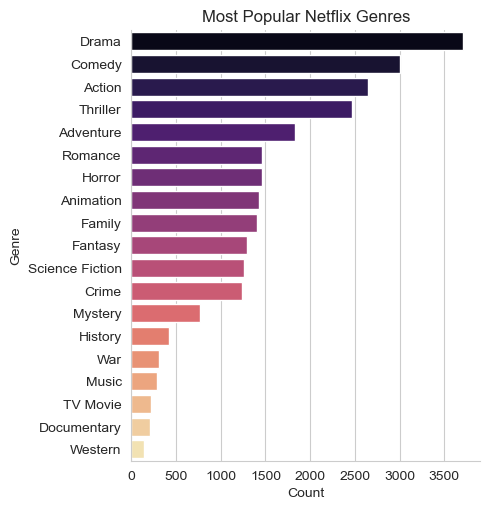

In [26]:
# visualizing genre column
plt.figure(figsize=(10, 5))
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, palette="magma")
plt.xlabel("Count") 
plt.ylabel("Genre")
plt.title("Most Popular Netflix Genres")
plt.show()

<h3>We can notice from the above graph that Drama genre is the most frequent genre on Netflix

<h3> Q2: Which genre has highest votes in vote avg column?



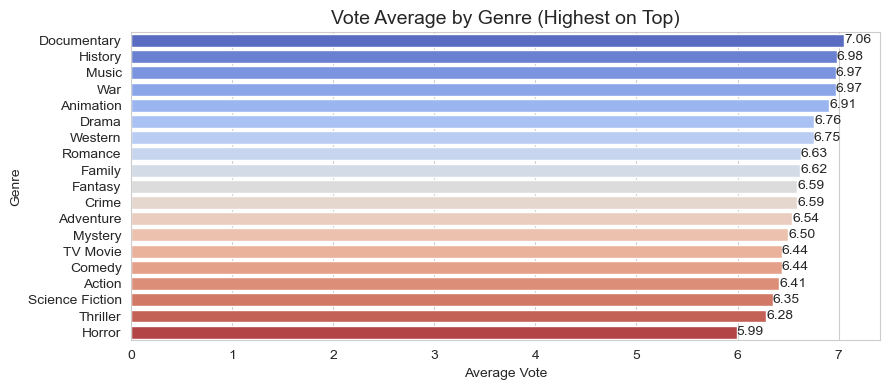

In [30]:
# Step 1: Group by Genre and calculate average vote
df_sorted = df.groupby('Genre', as_index=False)['Vote_Average'].mean()
df_sorted = df_sorted.sort_values('Vote_Average', ascending=False)

# Step 2: Get the genre order for plotting (highest on top)
genre_order = df_sorted['Genre']

# Step 3: Create the plot
plt.figure(figsize=(9, 4))
ax = sns.barplot(y='Genre', x='Vote_Average', data=df_sorted, palette='coolwarm', order=genre_order)

# Step 4: Add value labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Step 5: Titles and layout
plt.title('Vote Average by Genre (Highest on Top)', fontsize=14)
plt.xlabel('Average Vote')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


<h3>The Genre with the Highest Vote Average is: Documentary (7.06)




<h3>Q3: What movie got the highest popularity ? what's its
genre ?

In [31]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


<h3>"Spider-Man: No Way Home" has the highest popularity rate and it has
genres of "Action , Adventure and Sience Fiction"

<h3>Q4: What movie got the Lowest popularity ? what's its
genre ?

In [32]:
# checking min popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
25546,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25547,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25548,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25549,1984,Threads,13.354,186,7.8,War,popular
25550,1984,Threads,13.354,186,7.8,Drama,popular
25551,1984,Threads,13.354,186,7.8,Science Fiction,popular


<h3>"The United States" and "Threads" has the lowest rate 
and it has genres of "Music" , "Drama" , "War", "Sci-Fi" and "History".

<h3>Q5: Which year has the most filmed movies?

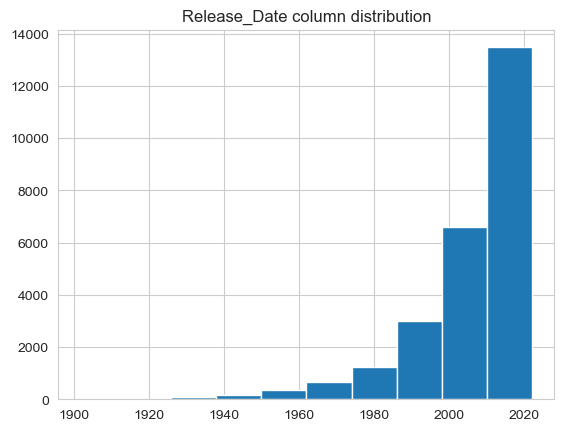

In [33]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()

<h3>Year 2020 has the highest filmming rate